### Libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from binance import Client
import pandas as pd

### Credentials

In [2]:
api_key = "binance_api_key"
api_secret = "binance_secret_key"

In [3]:
%matplotlib notebook

In [4]:
plt.style.use('ggplot')

In [5]:
client = Client(api_key, api_secret, testnet=True)

In [6]:
asset = 'BTCUSDT'

### Pulling Crypto Price Data

In [7]:
def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback))
    frame = frame.iloc[:, :6]
    frame.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
    frame = frame.set_index('Time')
    frame.index = pd.to_datetime(frame.index, unit='ms')
    frame = frame.astype(float)
    return frame

In [8]:
df = getminutedata(asset, '1m', '120m')

In [9]:
df

,Open,High,Low,Close,Volume
Time,,,,,
2023-05-20 16:40:00,26918.87,26920.92,26918.86,26920.92,0.890204
2023-05-20 16:41:00,26920.92,26921.13,26920.90,26920.92,0.985860
2023-05-20 16:42:00,26920.91,26920.92,26919.86,26919.90,0.488168
2023-05-20 16:43:00,26919.89,26920.02,26919.25,26919.89,1.120384
2023-05-20 16:44:00,26919.89,26923.16,26919.89,26923.15,1.861454
...,...,...,...,...,...
2023-05-20 18:35:00,27077.91,27086.35,27077.18,27086.08,2.689799
2023-05-20 18:36:00,27086.08,27090.19,27086.07,27089.00,2.401747
2023-05-20 18:37:00,27089.00,27093.77,27088.97,27090.82,3.014183


### Visualization

In [10]:
def animate(i):
    data = getminutedata(asset, '1m', '120m')
    plt.cla()
    plt.plot(data.index, data.Close)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(asset)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()

<IPython.core.display.Javascript object>


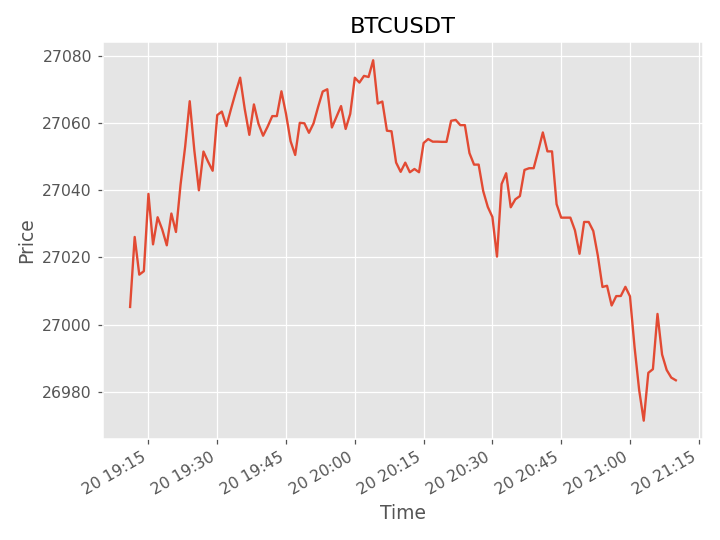

In [11]:
ani = FuncAnimation(plt.gcf(), animate, 1000)

plt.tight_layout()
plt.show()

### Liquidity Information

In [12]:
from binance.client import Client

# Create a Binance API client
client = Client(api_key, api_secret, testnet=True)

def get_liquidity(symbol, limit=100):
    # Retrieve depth data for the symbol
    depth = client.get_order_book(symbol=symbol, limit=limit)

    bids = depth['bids']  # List of buy orders
    asks = depth['asks']  # List of sell orders

    # Calculate total liquidity for buy and sell sides
    buy_liquidity = sum(float(bid[1]) for bid in bids)
    sell_liquidity = sum(float(ask[1]) for ask in asks)

    return buy_liquidity, sell_liquidity

# Example usage
symbol = 'BTCUSDT'
buy_liquidity, sell_liquidity = get_liquidity(symbol)
print(f"Buy Liquidity: {buy_liquidity}")
print(f"Sell Liquidity: {sell_liquidity}")

Buy Liquidity: 4.1410329999999975
Sell Liquidity: 6.496508000000001
